<a href="https://colab.research.google.com/github/netnavi20x5/Python-Notebooks/blob/main/2021_SEA_Covid_Min_Max_Scale.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Download to local file 
Data Source: from [2019 Novel Coronavirus COVID-19 (2019-nCoV) Data Repository by Johns Hopkins CSSE](https://github.com/CSSEGISandData/COVID-19)

<list>

<li><a href="https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv">Global Confirm</a></li>

<li><a href="https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv">Global Death</a></li>

<li><a href="https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv">Global Recovered</a> </li>
</list>

## Import library 

*   request
*   pandas

In [1]:
import requests
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import datetime  # to convert date

## Download from GITHUB to Local file to work locally

In [2]:
## function to download CSV file
def download_csv(file_target,url):
  myfile = requests.get(url)
  open(file_target, 'wb').write(myfile.content)
## Download CSV to work locally
download_csv('confirm.csv','https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
download_csv('death.csv','https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
download_csv('recover.csv','https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')


##Function From old Notebook


In [3]:
#a=cv19_conf3.groupby(['Country/Region'],axis=0).sum()

def group_by_country(df_data): #Group By Country
  return df_data.groupby('Country/Region').sum().drop(['Long','Lat'],axis=1)

def country_confirm_death_recover_active(confirm,death,recover): #Combine all the table and rename
  active=confirm-death-recover
  #rename Index
  for i in confirm.index:
    confirm=confirm.rename(index={i:i+ " - Confirm"})
  for i in death.index:
    death=death.rename(index={i:i+ " - Death"})
  for i in recover.index:
    recover=recover.rename(index={i:i+ " - Recover"})
  for i in active.index:
    active=active.rename(index={i:i+ " - Active"})
  
  combine=confirm.append(recover)
  combine=combine.append(death)
  combine=combine.append(active)
  return combine

def country_confirm_death_recover(confirm,death,recover): #Combine all the table and rename
  active=confirm-death-recover
  #rename Index
  for i in confirm.index:
    confirm=confirm.rename(index={i:i+ " - Confirm"})
  for i in death.index:
    death=death.rename(index={i:i+ " - Death"})
  for i in recover.index:
    recover=recover.rename(index={i:i+ " - Recover"})

  combine=confirm.append(death)
  combine=combine.append(recover)
  return combine

def sort_column(data_frame):
  last_col=data_frame.columns.size
  last_col_name=data_frame.columns[last_col-1]
  return data_frame.sort_values(by=last_col_name, ascending=False)

def conv_column_date(dataframe):
  date_out=[]
  for i in range(len(dataframe.columns)):
    date_str =dataframe.columns[i]
    format_str = '%m/%d/%y' # The format
    datetime_obj = datetime.datetime.strptime(date_str, format_str)
    date_out.append(str(datetime_obj.strftime("%d-%m-%Y")))
  dataframe.columns=date_out
  return dataframe

def add_date(last_date,size): #date format must be %d-%m-%Y macgyvering date because i am lazy
  extend_date=[]  
  date_str = last_date
  format_str= '%d-%m-%Y'
  datetime_obj = datetime.datetime.strptime(date_str, format_str)
  for i in range(size):
    temp=datetime_obj+datetime.timedelta(days=i+1)
    temp2=temp.strftime("%d-%m-%Y")
    extend_date.append(temp2)
  return extend_date

def add_new_case(dataframe,today,number,field): #macgyver code malas just to add today data if any
  dataframe.at[field,today]=number
  return dataframe


def plot_graph_C_D_R_A(dataframe): # confirm, death, recover and active
  plt.figure(figsize=(20,10))
  plt.subplot(211)
  plt.xticks(rotation=45)
  plt.title(country, fontsize=30)
  plt.xlabel('Date', fontsize=20)
  plt.ylabel('No of patient', fontsize=20)
  plt.autoscale(enable=True, axis='x', tight=None)
  for i in range(dataframe.index.size):
    plt.plot(dataframe.columns.values,dataframe.values[i])
  plt.legend(dataframe.index)
  plt.grid()


def bar_graph_C_D_R_A(dataframe): # confirm, death, recover and active
  plt.figure(figsize=(20,10))
  plt.subplot(211)
  plt.xticks(rotation=45)
  plt.title(country, fontsize=30)
  plt.xlabel('Date', fontsize=20)
  plt.ylabel('No of patient', fontsize=20)
  plt.autoscale(enable=True, axis='x', tight=None)
  for i in range(dataframe.index.size):
    plt.bar(dataframe.columns.values,dataframe.values[i])
  plt.legend(dataframe.index)

def append_confirm(countries):
  out=[]
  for i in countries:
    out.append(i+' - Confirm')
  return out

def append_death(countries):
  out=[]
  for i in countries:
    out.append(i+' - Death')
  return out

def append_recover(countries):
  out=[]
  for i in countries:
    out.append(i+' - Recover')
  return out


In [4]:
import datetime
df_cv19_conf = pd.read_csv('confirm.csv')  
df_cv19_deat = pd.read_csv('death.csv')  
df_cv19_reco = pd.read_csv('recover.csv')  
confirm=group_by_country(df_cv19_conf)
death=group_by_country(df_cv19_deat)
recover=group_by_country(df_cv19_reco)
merge_all=country_confirm_death_recover_active(confirm,death,recover)
merge_all=conv_column_date(merge_all)
merge_all.filter(like='Malaysia',axis=0)


#------------------------------------------------------------------------------------------------
last_date = merge_all.columns[merge_all.columns.size-1] #Macgyvering date
add_column=add_date(last_date,5)

In [5]:
def active_case_country(confirm,death,recover,country):
  active=pd.DataFrame()
  active=confirm.filter(like=country,axis=0)-death.filter(like=country,axis=0)-recover.filter(like=country,axis=0)
  active_cases=active.T.reset_index(drop=True)
  #active_cases.index=active_cases.index.rename("Day")
  return active_cases


In [6]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
def mix_max_scale_data(df):
  min_max_scaler = MinMaxScaler()
  transform = min_max_scaler.fit_transform(df)
  #df["scale "+df.keys()[0]]=transform
  df["scale"]=transform
  return df


Text(0.5, 1.0, 'Normalized Min Max Covid 19 Active Cases in Selected SEA Country')

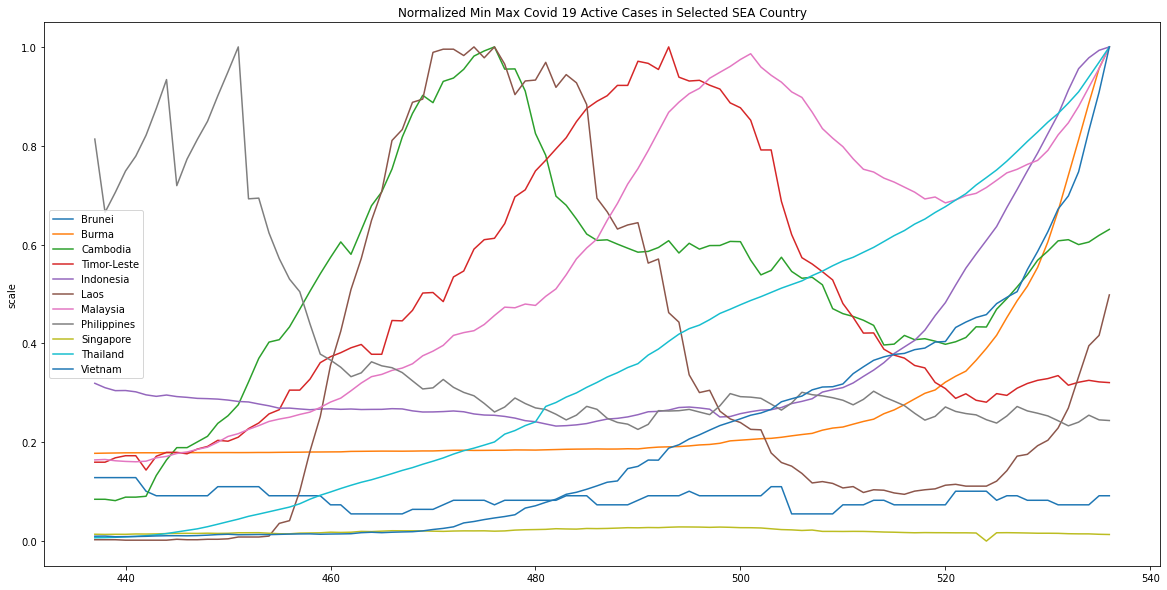

In [7]:
data=dict()

SEA=("Brunei","Burma","Cambodia","Timor-Leste","Indonesia","Laos","Malaysia","Philippines",\
     "Singapore","Thailand","Vietnam")

for i in SEA:
  data[i]=mix_max_scale_data(active_case_country(confirm,death,recover,i)).tail(100)
  
import seaborn as sns
import matplotlib.pyplot as plt
#f, ax = plt.subplots(1, 1)
fig, ax = plt.subplots(figsize=(20, 10))

for i in SEA:
  sns.lineplot(data=data[i],x=data[i].index, y="scale")
ax.legend(SEA)
ax.set_title("Normalized Min Max Covid 19 Active Cases in Selected SEA Country")